# 1.feature engineering


## 1.1-get the dataset

In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [2]:
# data file name  /dataAll.csv  /testAll.csv
data_train = pd.read_csv('dataAll.csv')
data_train.head()

,21000,21001,21002,21003,21004,21005,21006,21007,21008,21009,...,35007,35008,35009,350010,350011,350012,350013,350014,x,y
0,-126.23,-126.23,-126.23,-96.28,-126.23,-126.23,-126.23,-126.23,-97.92,-124.68,...,-126.23,-126.23,-106.09,-109.26,-94.31,-101.30,-102.86,-126.23,0.0,10.8
1,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-105.06,-95.94,-126.23,...,-126.23,-126.23,-104.70,-126.23,-92.16,-100.80,-101.01,-126.23,0.0,11.4
2,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-95.92,-116.21,...,-126.23,-126.23,-104.64,-126.23,-91.62,-100.41,-100.74,-126.23,0.0,12.0
3,-126.23,-126.23,-126.23,-111.22,-126.23,-126.23,-126.23,-126.23,-96.70,-108.96,...,-126.23,-126.23,-104.57,-126.23,-91.27,-99.74,-100.50,-126.23,0.0,12.6
4,-126.23,-126.23,-126.23,-104.29,-126.23,-126.23,-126.23,-126.23,-96.70,-107.75,...,-126.23,-123.01,-104.55,-126.23,-91.09,-99.12,-100.30,-119.82,0.0,13.2


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3863 entries, 0 to 3862
Data columns (total 32 columns):
21000     3863 non-null float64
21001     3863 non-null float64
21002     3863 non-null float64
21003     3863 non-null float64
21004     3863 non-null float64
21005     3863 non-null float64
21006     3863 non-null float64
21007     3863 non-null float64
21008     3863 non-null float64
21009     3863 non-null float64
210010    3863 non-null float64
210011    3863 non-null float64
210012    3863 non-null float64
210013    3863 non-null float64
210014    3863 non-null float64
35000     3863 non-null float64
35001     3863 non-null float64
35002     3863 non-null float64
35003     3863 non-null float64
35004     3863 non-null float64
35005     3863 non-null float64
35006     3863 non-null float64
35007     3863 non-null float64
35008     3863 non-null float64
35009     3863 non-null float64
350010    3863 non-null float64
350011    3863 non-null float64
350012    3863 non-null float

In [4]:
# 所有数据都 + 126.23 为0的这代表该频段无信号
data_train_add = data_train.iloc[:,:30].applymap(lambda x: x+126.23)
train_loc = data_train.iloc[:,30:]
data_train_add.to_csv("./processed_data/train_pro.csv",index = False)
m = data_train_add.describe()
m.to_csv("./processed_data/des_pro.csv",index = False)

In [5]:
a=data_train_add.columns.values.tolist()
m=[0,15,1,16,2,17,3,18,4,19,5,20,6,21,7,22,8,23,9,24,10,25,11,26,12,27,13,28,14,29]
order=[]
for i in m:
    order.extend([a[i]])
reoder_data = data_train_add[order]
reoder_data.to_csv("./processed_data/reorder.csv",index = False)

In [7]:
reoder_data

,21000,35000,21001,35001,21002,35002,21003,35003,21004,35004,...,210010,350010,210011,350011,210012,350012,210013,350013,210014,350014
0,0.0,0.0,0.00,0.00,0.00,0.00,29.95,24.95,0.00,0.00,...,0.00,16.97,35.65,31.92,27.97,24.93,31.83,23.37,0.00,0.00
1,0.0,0.0,0.00,0.00,0.00,0.00,0.00,25.31,0.00,0.00,...,0.00,0.00,42.97,34.07,28.03,25.43,33.79,25.22,0.00,0.00
2,0.0,0.0,0.00,0.00,0.00,0.00,0.00,25.48,0.00,0.00,...,0.00,0.00,43.36,34.61,28.30,25.82,33.93,25.49,0.00,0.00
3,0.0,0.0,0.00,0.00,0.00,0.00,15.01,25.65,0.00,0.00,...,0.00,0.00,42.82,34.96,28.76,26.49,33.42,25.73,0.00,0.00
4,0.0,0.0,0.00,2.69,0.00,0.00,21.94,25.83,0.00,0.00,...,0.00,0.00,42.90,35.14,29.49,27.11,33.63,25.93,0.00,6.41
5,0.0,0.0,0.00,3.05,0.00,0.00,22.47,26.01,0.00,0.00,...,0.00,0.00,42.82,35.16,30.59,27.72,33.83,26.11,0.68,6.81
6,0.0,0.0,8.75,3.39,0.00,0.00,24.29,26.20,0.00,0.00,...,0.00,0.00,42.58,35.00,34.52,28.33,34.00,26.27,13.68,7.21
7,0.0,0.0,13.25,3.75,0.00,0.00,26.48,26.39,0.00,0.00,...,14.82,0.00,42.17,34.69,36.35,28.90,34.14,26.41,17.72,7.62
8,0.0,0.0,14.00,4.10,0.00,0.00,26.57,26.58,0.00,0.00,...,16.93,8.15,41.67,34.23,37.17,29.57,34.25,26.52,19.03,8.03
9,0.0,0.0,14.38,3.58,0.00,0.00,26.75,26.78,0.00,0.00,...,17.01,10.63,41.06,33.70,37.91,30.25,34.31,26.59,19.45,7.56


In [6]:
#data_train_add.iloc[:,0].value_counts()

## 1.2-plot 可视化分析

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)

plt.subplot2grid((2,3),(0,0))

Text(0, 0.5, 'amount')

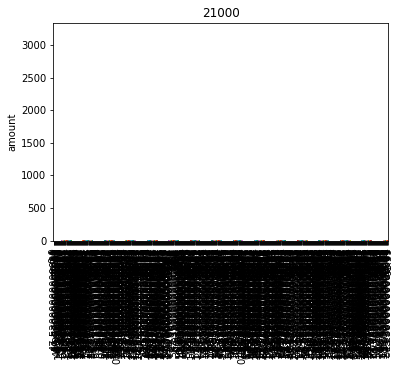

In [8]:
data_train_add.iloc[:,0].value_counts().plot(kind='bar')
plt.title('21000')
plt.ylabel('amount')

In [9]:
train_loc
data_train_add.head()

,21000,21001,21002,21003,21004,21005,21006,21007,21008,21009,...,35005,35006,35007,35008,35009,350010,350011,350012,350013,350014
0,0.0,0.0,0.0,29.95,0.0,0.0,0.0,0.00,28.31,1.55,...,0.0,0.0,0.0,0.00,20.14,16.97,31.92,24.93,23.37,0.00
1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,21.17,30.29,0.00,...,0.0,0.0,0.0,0.00,21.53,0.00,34.07,25.43,25.22,0.00
2,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,30.31,10.02,...,0.0,0.0,0.0,0.00,21.59,0.00,34.61,25.82,25.49,0.00
3,0.0,0.0,0.0,15.01,0.0,0.0,0.0,0.00,29.53,17.27,...,0.0,0.0,0.0,0.00,21.66,0.00,34.96,26.49,25.73,0.00
4,0.0,0.0,0.0,21.94,0.0,0.0,0.0,0.00,29.53,18.48,...,0.0,0.0,0.0,3.22,21.68,0.00,35.14,27.11,25.93,6.41


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(600, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y += (0.5 - rng.rand(*y.shape))


In [11]:
train_loc_list=[]
for i in range(len(train_loc)):
    train_loc_list.append([train_loc.iloc[i,0],train_loc.iloc[i,1]])
len(train_loc_list)

3863

In [12]:
def cos_vali(data_list,class_list,test_size = 0.2):
    data_class_list = list(zip(data_list, class_list))
    import random
    random.shuffle(data_class_list)
    index = int(len(data_class_list)*test_size)#+1
    train_list = data_class_list[index:]
    test_list = data_class_list[:index]
    train_data_list, train_class_list = zip(*train_list)
    test_data_list, test_class_list = zip(*test_list)
    return list(train_data_list),list(test_data_list),list(train_class_list),list(test_class_list)

In [13]:
train_data_list, test_data_list, train_class_list, test_class_list = cos_vali(np.array(data_train_add).tolist(),train_loc_list)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset

X_train, X_test, y_train, y_test = cos_vali(np.array(data_train_add).tolist(),train_loc_list)
X_train, X_test, y_train, y_test = np.array(X_train),np.array(X_test),np.array(y_train),np.array(y_test)

In [15]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

def error(y_test,y_pre):
    m = y_test-y_pre
    m=np.square(m)
    m=m.sum(axis=1)
    m=np.sqrt(m)
    return m.sum()/len(y_test)
    

# Create a random dataset
def m(max_depth):
    a=[]
    print('max_depth {}'.format(max_depth))
    for i in range(10):
        X_train, X_test, y_train, y_test = cos_vali(np.array(data_train_add).tolist(),train_loc_list)
        X_train, X_test, y_train, y_test = np.array(X_train),np.array(X_test),np.array(y_train),np.array(y_test)

        #max_depth = 30
        regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                            max_depth=max_depth,min_samples_leaf=2,oob_score=True))
        regr_multirf.fit(X_train, y_train)

        #regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth,
                            #    random_state=2)
        #regr_rf.fit(X_train, y_train)

        # Predict on new data
        y_multirf = regr_multirf.predict(X_test)
        #y_rf = regr_rf.predict(X_test)
        #print('echo {}'.format(max_depth))
        #print(error(y_test,y_rf))
        m=error(y_test,y_multirf)
        print(m)
        a.extend([m])
    return a
c = []
for max_depth in range(20,50):
    c.append(m(max_depth))
c

max_depth 20
1.305738329003053
1.2930163092201539
1.1593626667895656
1.1184178302992693
1.1205139361177576
1.1035343244786158
1.140815756620258
1.1635775884566395
1.069782642294288
1.0083273730886944
max_depth 21
1.0896611380073764
1.0638494591210792
1.1017452349684238
1.176079389286011
1.0822834185716936
1.1102428919510237
1.1165166946027776
1.0356807575661788
1.0793156668811839
1.2025532403040602
max_depth 22
1.1132516993880524
1.1381977261148075
1.084281619289059
1.1072209940345477
1.2784031384201826
1.1312437261414863
1.0844103367031577
1.1017248644044155
1.2114245005088646
1.210689375376138
max_depth 23
1.1149018564912592
1.1373672669795927
1.20448271996809
1.2032397426528967
1.0665100014991555
1.0610197951280496
1.2197380862449452
1.016806027147898
1.0438361638192553
1.0274136787596717
max_depth 24
1.1474196677159199
1.0909931133543447
1.1886605222248177
1.2831600857468384
1.1282551025779395
1.1783145126707375
1.0332632743734516
1.1732327170646448
1.0831978695041022
1.06708312570

[[1.305738329003053,
  1.2930163092201539,
  1.1593626667895656,
  1.1184178302992693,
  1.1205139361177576,
  1.1035343244786158,
  1.140815756620258,
  1.1635775884566395,
  1.069782642294288,
  1.0083273730886944],
 [1.0896611380073764,
  1.0638494591210792,
  1.1017452349684238,
  1.176079389286011,
  1.0822834185716936,
  1.1102428919510237,
  1.1165166946027776,
  1.0356807575661788,
  1.0793156668811839,
  1.2025532403040602],
 [1.1132516993880524,
  1.1381977261148075,
  1.084281619289059,
  1.1072209940345477,
  1.2784031384201826,
  1.1312437261414863,
  1.0844103367031577,
  1.1017248644044155,
  1.2114245005088646,
  1.210689375376138],
 [1.1149018564912592,
  1.1373672669795927,
  1.20448271996809,
  1.2032397426528967,
  1.0665100014991555,
  1.0610197951280496,
  1.2197380862449452,
  1.016806027147898,
  1.0438361638192553,
  1.0274136787596717],
 [1.1474196677159199,
  1.0909931133543447,
  1.1886605222248177,
  1.2831600857468384,
  1.1282551025779395,
  1.17831451267

In [ ]:
y_test

In [ ]:
y_rf

In [16]:
def error(y_test,y_pre):
    m = y_test-y_pre
    m=np.square(m)
    m=m.sum(axis=1)
    m=np.sqrt(m)
    return m.sum()/len(y_test)
    

In [146]:
error(y_test,y_rf)

0.9879546295619904

In [ ]:
'''
# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(y_test[:, 0], y_test[:, 1], edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="Data")
plt.scatter(y_multirf[:, 0], y_multirf[:, 1], edgecolor='k',
            c="cornflowerblue", s=s, alpha=a,
            label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test))
plt.scatter(y_rf[:, 0], y_rf[:, 1], edgecolor='k',
            c="c", s=s, marker="^", alpha=a,
            label="RF score=%.2f" % regr_rf.score(X_test, y_test))
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()'''